In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
couple_data = pd.read_csv(r'C:\Users\maria\Desktop\AstroEconomics\data.csv', sep='\t')
couple_df  = couple_data
couple_df.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
0,15Pari10780,1911.03.09 17:42:28,15Pari10789,1911.11.22 20:27:28,48N49-2E19,48N49-2E19,0.703,,,,...,,,,,,,,1.4,,
1,15Pari76,1880.03.10 21:36:33,15Pari77,1876.08.12 01:36:33,48N49-2E19,48N49-2E19,-3.581,,,,...,,-4.5,,,,,,,,
2,14PRPari490,1884.04.06 04:42:50,14PRPari491,1886.03.07 19:42:50,47N54-1E54,48N07-5E07,1.919,,,,...,,,,,,,,,,
3,Bourg2385,1935.10.09 10:06:22,Bourg2386,1940.03.31 19:15:42,47N04-2E22,47N04-2E22,4.478,,,,...,,,,,,,,,,
4,Bourg1498,1893.06.27 21:37:16,Bourg1499,1896.08.06 05:37:16,48N49-2E19,47N04-2E22,3.108,,,,...,,,,,,,,-5.3,,


In [3]:
couple_df = couple_df.replace({" ":0})
couple_df.tail()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
19517,Bourg2538,1912.06.06 03:33:52,Bourg2539,1917.02.21 10:33:52,47N04-2E22,47N04-2E22,4.708,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19518,15Pari3873,1902.04.21 16:28:35,15Pari3874,1907.01.13 20:01:35,48N49-2E19,48N49-2E19,4.731,0,0,0,...,0,0,0,0,0,-6.0,0,0,0,0
19519,Bourg441,1933.11.29 10:16:01,Bourg442,1937.01.07 04:16:01,47N04-2E22,47N04-2E22,3.097,0,0,0,...,0,0,0,0,1.5,0,0,4.8,0,0
19520,Lil4511,1897.09.21 03:12:29,Lil4514,1890.06.29 03:09:29,50N39-3E04,50N39-3E04,-7.231,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19521,14PRPari4269,1899.05.28 03:47:35,14PRPari4270,1904.12.07 01:50:35,47N40-2W43,43N31-6E28,5.522,0,0,0,...,0,0,0,-6.0,0,0,0,0,0,0


In [13]:
##couple_df.to_csv(AstroEconomics/"astrology_data")

In [31]:
#couple_df['A-B-MerCnjMer'].str.strip()

#for row in couple_df['A-B-MerCnjMer'].iteritems():
#    print(repr(row))

# X = smoking[['Age', 'Height', 'Sex_Female', 'Sex_Male', 'Smoker_Current', 'Smoker_Non']]
y = couple_df["B_Minus_A_AgeDifference_Years"].values.reshape(-1, 1)
X = couple_df.iloc[:,7:]

print(X.shape, y.shape)

    

(19522, 405) (19522, 1)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

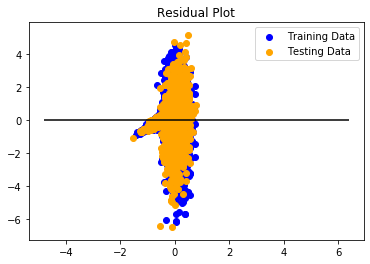

In [35]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [37]:
model.score(X_test_scaled, y_test_scaled)

-0.002732353285738176

In [38]:
model.predict(X_test_scaled)

array([[-0.6719517 ],
       [ 0.12666746],
       [ 0.18526095],
       ...,
       [-0.30879783],
       [ 0.1536422 ],
       [ 0.35486157]])

In [39]:
y_test_scaled

array([[-0.67351067],
       [ 0.29431368],
       [ 0.50049396],
       ...,
       [-0.39052235],
       [ 0.02012182],
       [ 1.11023832]])

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
# Fit the model to the data
kmeans.fit(X)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

In [41]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [42]:
centers

array([[-1.66533454e-16, -1.21430643e-17, -8.67361738e-19, ...,
         4.09523810e-02, -6.57142857e-02, -3.38095238e-02],
       [-1.36199095e-01,  4.07239819e-03, -3.50678733e-02, ...,
         1.76470588e-02,  2.03619910e-03,  6.15826834e-17],
       [-2.92966700e+00, -9.28077060e-17, -5.03069808e-17, ...,
        -1.95761857e-02,  2.11907164e-02, -1.65489405e-02],
       ...,
       [-5.96209913e-02,  5.34985423e-02,  2.18658892e-03, ...,
         6.76384840e-02,  3.17784257e-02,  6.55976676e-03],
       [-5.82205029e-02, -9.28433269e-03, -8.60735010e-03, ...,
         8.22050290e-03,  2.51450677e-03,  1.87620890e-02],
       [-5.36130536e-02, -6.52680653e-03,  6.99300699e-02, ...,
        -1.32867133e-02, -4.24242424e-02, -3.19347319e-02]])

In [43]:
labels

array([4, 3, 5, ..., 3, 1, 4])